# <font color=black>DATA 557 Homework 3</font>
***
### <font color=black>Question 1
The data are from a study of the association between exposure to lead and IQ. The study was conducted in 
an urban area around a lead smelter. A random sample of 124 children who lived in the area was selected. 
Each study participant had a blood sample drawn in both 1972 and 1973 to assess blood concentrations of 
lead. The children were grouped based on their blood concentrations as follows:<br>
Group 1: concentration < 40 mg/L in both 1972 and 1973<br>
Group 2: concentration > 40 mg/L in both 1972 and 1973 or > 40 mg/L in 1973 alone (3 participants)<br>
Group 3: concentration > 40 mg/L in 1972 but < 40 mg/L in 1973<br>
Each participant completed an IQ test in 1973. (A subset of the IQ scores from this study were used in HW
1, Question 3.) <br>The variables in the data set are listed below.<br>
ID: Participant identification number<br>
SEX: Participant sex (1=M or 2=F)<br>
GROUP: As described above (1, 2, or 3)<br>
IQ: IQ score</font><br>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
from scipy import stats

##### <font color=black>1. The first goal is to compare the mean IQ scores for males and females. Use a 2-sample t-test for this comparison. What is the p-value?</font>

We can define the Hypothesis for the 2-sample t-test as follows:
<br>
We can define the null hypothesis as : <br>
<center> H0 : μ<sub>male</sub> = μ<sub>female</sub>  <br>
                           H1 : μ<sub>male</sub> ≠ μ<sub>female</sub> </center>
We can define the Rejection Rule as :<br>
<center>Reject H0 if p value > 0.05</center>
assuming significance level of 0.05 

In [48]:
df = pd.read_csv("data/lead_study.csv")

In [49]:
female = df.loc[(df["SEX"] == 2)]
male = df.loc[(df["SEX"] == 1)]
varFemale = female['IQ'].var()
varMale = male['IQ'].var()
pooled_var=(((len(female)-1)*varFemale)+((len(male)-1)*varMale))/(len(female)+len(male)-2)
test_statistic_t = (male['IQ'].mean() - female['IQ'].mean())/((pooled_var)*((1/len(female))+(1/len(male))))**0.5
print('\033[1m'+'t-test:\n\tpooled variance : %f \n\ttest statistic : %f \n\tp value : %f'%(pooled_var,test_statistic_t,p_val))


t-test:
	pooled variance : 204.133519 
	test statistic : 0.153807 
	p value : 0.877946


__2. State the conclusion from your test.__ 

As the p-value is much higher than our significance level of 0.05,<br>
we __do not have enough evidence__ to reject the null hypothesis.<br>
We cannot conclusively say that IQ is inherently different for men and women.

__3. Are the independence assumptions valid for the t-test in this situation? Give a brief explanation.__ 

The assumption of independence for the t-test is stated as follows :<br>
"the two samples must be independent and the observations within each sample must be independent." <br>
Here, our two samples for male and female are  independent as none of the values between these samples are paired. The data collected for one sample would not have any affect on the data collected for the other.

__4. The second goal is to compare the mean IQ scores in the 3 groups. State in words the null hypothesis for 
this test.__ 

We can define the Null Hypothesis as :<br>
<center>H0 : The means of all the 3 groups are equal<br>H0 : μ<sub>group1</sub> = μ<sub>group2</sub> = μ<sub>group3</sub> </center>

__5. State in words the alternative hypothesis for this test.__ 

We can define the Alternative Hypothesis as :<br>
<center>H1 : The 3 means are not __all__ equal</center>

__6. What method should be used to perform the test?__ 

In [50]:
print("MALE Variance : %f\nFEMALE Variance : %f" %(varMale,varFemale))

MALE Variance : 222.929825
FEMALE Variance : 184.554033


ANOVA is defined as : "ANOVA is simply an extension of the 2-sample equal-variance t-test to the
comparison of 3 or more population means."<br>

Hence, __ANOVA__ is the appropriate test to perform in this case.

__7. Perform the test. Report the p-value.__ 

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('IQ ~ GROUP',data=df).fit()
anova = sm.stats.anova_lm(m,typ=1)
print(anova)
print('\033[1m'+"\n\nF statistic : %f \np value : %f"%(anova['F'][0],anova['PR(>F)'][0]))

             df        sum_sq      mean_sq         F    PR(>F)
GROUP       1.0   1320.565019  1320.565019  6.765781  0.010242
Residual  147.0  28691.891356   195.182934       NaN       NaN


F statistic : 6.765781 
p value : 0.010242


__8. State your conclusion about the evidence for an association between lead exposure and IQ.__ 

Assuming a significance level of 0.05, we see that the p value is less than this. <br>
Hence, We __reject__ the null hypothesis.<br>
In this question, we can think of the 3 groups as follows : <br>
Group 1 : The lead concentration was below the threshold for both years. <br>
Group 2 : The lead concentration was above the threshold for both years or has increased in the 2nd year. <br>
Group 3 : The lead concentratin was above the threshold in the first year and below the threshold in the second year.<br>

So, when we reject the null hypothesis that the means are not all equal for these three groups, we can state it as :<br> If lead exposure had no effect on IQ, then the means would be equal and we would not have enough evidence to reject the null hypothesis but since we rejected the null hypothesis we can say that : <br>__There could be an association between lead exposure and IQ.__

__9. Are there strong reasons to believe that the assumptions of this test are not met? Briefly justify your 
answer.__ 

In [52]:
df1,df2,df3 = [df.loc[(df["GROUP"] == x)] for x in range(1,4)]
print("Group 1 variance : %f\nGroup 2 variance : %f\nGroup 3 variance : %f" %(df1["IQ"].var(),df2["IQ"].var(),df3["IQ"].var()))

Group 1 variance : 242.434643
Group 2 variance : 90.297379
Group 3 variance : 168.033333


The assumptions for ANOVA are as follows : <br>
1. Independence (of samples and of observations within each sample)
2. Equal variances
3. Large sample sizes or normal distributions
<br>

While 1 and 3 can be safely assumed, as there are no pair data present in the 3 samples and even though the sample sizes are not relatively large,we can assume normal distribution for the respective populations.<br>

I believe, the 2nd assumption of equal variances is not met as there is quite a big difference among these values, especially when you compare Group 1 and Group 2. 


__10. Conduct all pairwise comparison of group means. Report the p-values.__

In [53]:
def test(df, pair):
    df1,df2 = [df.loc[(df["GROUP"] == x)] for x in pair]
    pooled_var = (((len(df1)-1)*df1["IQ"].var())+((len(df2)-1)*df2["IQ"].var()))/(len(df1)+len(df2)-2)
    test_statistic = (df1["IQ"].mean()-df2["IQ"].mean())/((pooled_var*((1/len(df1))+(1/len(df2))))**0.5)
    p_val = stats.t.sf(abs(test_statistic), df=len(df1)+len(df2)-2)*2
    print("For Pair (Group %s, Group %s) :\n\tTest Statistic = %f \n\t\033[1mp-value\033[0m = %f"%(pair[0],pair[1],test_statistic,p_val))
groups=[1,2,3]
print('\033[1m'+"NOT ANSWER"+'\033[0m')
for i in range(2):
    for j in range(i+1,3):
        test(df,[groups[i],groups[j]])        

NOT ANSWER
For Pair (Group 1, Group 2) :
	Test Statistic = 2.064377 
	p-value = 0.041193
For Pair (Group 1, Group 3) :
	Test Statistic = 2.134053 
	p-value = 0.034963
For Pair (Group 2, Group 3) :
	Test Statistic = 0.239962 
	p-value = 0.811178


In [54]:
def test_welch(df, pair):
    df1,df2 = [df.loc[(df["GROUP"] == x)] for x in pair]
    welch_df = (((df1["IQ"].var()/len(df1))+(df2["IQ"].var()/len(df2)))**2)/((df1["IQ"].var()**2/((len(df1)**2)*(len(df1)-1)))+(df2["IQ"].var()**2/((len(df2)**2)*(len(df2)-1))))
    test_statistic = (df1["IQ"].mean()-df2["IQ"].mean())/(((df1["IQ"].var()/len(df1))+(df2["IQ"].var()/len(df2)))**0.5)
    p_val = stats.t.sf(abs(test_statistic), df=welch_df)*2
    print("For Pair (Group %s, Group %s) :\n\tTest Statistic = %f \n\t\033[1mp-value\033[0m = %f"%(pair[0],pair[1],test_statistic,p_val))
print('\033[1m'+"ANSWER"+'\033[0m')
for i in range(2):
    for j in range(i+1,3):
        test_welch(df,[groups[i],groups[j]])        

ANSWER
For Pair (Group 1, Group 2) :
	Test Statistic = 2.562230 
	p-value = 0.012051
For Pair (Group 1, Group 3) :
	Test Statistic = 2.333256 
	p-value = 0.023003
For Pair (Group 2, Group 3) :
	Test Statistic = 0.237605 
	p-value = 0.813104


__11. What conclusion about the association between lead and IQ would you draw from the pairwise 
comparisons of group means? Does it agree with the conclusion in Q8? (Consider the issue of multiple 
testing in your answer.)__ 

I applied the Welch t test because as discussed in 9, the variances of our samples were unequal.<br>
Before the Bonferroni Correction, when alpha is 0.05, two pairs (1,2) and (1,3) are both less than 0.05, we reject the null hypothesis. <br>
Applying the Bonferroni Correction to qualify the inflated Type I Error, The significance level for each test is approximately __0.0166__.<br>
For groups (1,3) and (2,3), the p value is greater than 0.0166, but for group (1,2), the p value is less than 0.0166, hence we __reject__ the null hypothesis.<br> There could be an association between lead exposure and IQ.
Our conclusion __agrees__ with the conclusion of Q8.

I also reported the equal variance t-test and we can see that due to unequal variances, we would not have enough evidence to reject the null hypothesis as all the p values are greater than the Bonferroni corrected alpha of 0.0166.

__12. Now we wish to compare the 3 group means for males and females separately. Display some 
appropriate descriptive statistics for this analysis.__ 

In [59]:
for x in [df1,df2,df3]:
    gfemale = x.loc[(x["SEX"] == 2)]
    gmale = x.loc[(x["SEX"] == 1)]
    print("Mean Female : %f\t\t\tMean Male : %f\nStd Dev Female : %f\t\tStd Dev Male : %f\nLen female : %f\t\t\tLen Male : %f" %(gfemale['IQ'].mean(),gmale['IQ'].mean(),gfemale['IQ'].var()**0.5,gmale['IQ'].var()**0.5,len(gfemale),len(gmale)))
    

Mean Female : 94.609756			Mean Male : 92.934783
Std Dev Female : 15.877465		Std Dev Male : 15.423506
Len female : 41.000000			Len Male : 46.000000
Mean Female : 84.800000			Mean Male : 90.176471
Std Dev Female : 6.471917		Std Dev Male : 11.131236
Len female : 15.000000			Len Male : 17.000000
Mean Female : 87.235294			Mean Male : 86.615385
Std Dev Female : 8.898942		Std Dev Male : 17.327908
Len female : 17.000000			Len Male : 13.000000


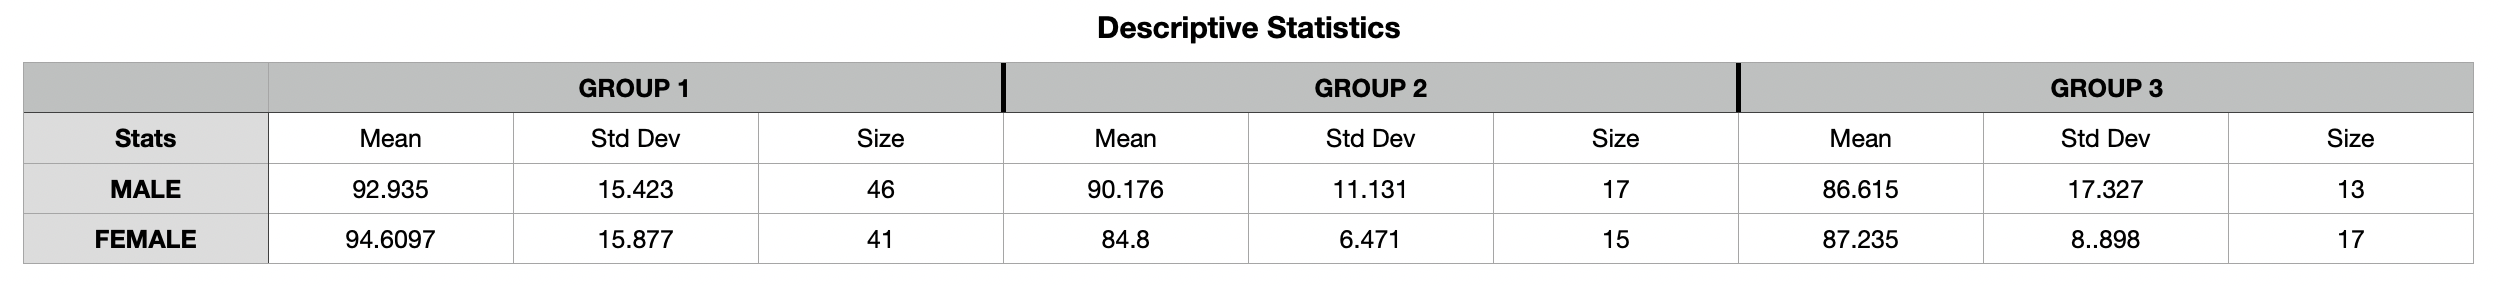

__13. Perform tests to compare the mean IQ scores in the 3 groups for males and females separately. Report 
the p-values from the two tests.__

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('IQ ~ GROUP',data=female).fit()
anova = sm.stats.anova_lm(m,typ=1)
print('\033[1m'+"FEMALE GROUP :"+'\033[0m')
print(anova)
print('\033[1m'+"\nF statistic : %f \np value : %f\033[0m \n\n"%(anova['F'][0],anova['PR(>F)'][0]))

m = ols('IQ ~ GROUP',data=male).fit()
anova = sm.stats.anova_lm(m,typ=1)
print('\033[1m'+"\n\nMALE GROUP :"+'\033[0m')
print(anova)
print('\033[1m'+"\nF statistic : %f \np value : %f"%(anova['F'][0],anova['PR(>F)'][0]))



FEMALE GROUP :
            df        sum_sq     mean_sq        F    PR(>F)
GROUP      1.0    922.125512  922.125512  5.29453  0.024332
Residual  71.0  12365.764899  174.165703      NaN       NaN

F statistic : 5.294530 
p value : 0.024332 




MALE GROUP :
            df        sum_sq     mean_sq         F    PR(>F)
GROUP      1.0    427.455252  427.455252  1.941514  0.167675
Residual  74.0  16292.281591  220.165967       NaN       NaN

F statistic : 1.941514 
p value : 0.167675


__14. What can you conclude about the association between lead and IQ from these tests? Does it agree with 
the result in Q8 and Q11? (Consider multiple testing.)__ 

For the __Female__ group, we can see that the p value is less than the significance level of 0.05, Hence we __reject__ the Null Hypothesis. So there could be an association between lead exposure and IQ.<br>
For the __Male__ group, we can see that the p value is greater than the significance level of 0.05, Hence we __cannot reject__ the Null Hypothesis.So we __cannot say that there is__ association between lead exposure and IQ.<br>

In Q8 and Q11, we rejected the Null Hypothesis, but when we increased the level of granularity and considered another variable (sex), we find that there is a distinction on our hypothesis based on this variable. Since the samples in Q8 and Q11, considered both females and males, it intuitively makes sense that we still rejected it as it holds true for females.

__15. Now perform all 3 pairwise comparisons of groups for males and females separately. Report the p-
values from these tests?__

In [33]:
def test_welch(df, pair):
    df1,df2 = [df.loc[(df["GROUP"] == x)] for x in pair]
    welch_df = (((df1["IQ"].var()/len(df1))+(df2["IQ"].var()/len(df2)))**2)/((df1["IQ"].var()**2/((len(df1)**2)*(len(df1)-1)))+(df2["IQ"].var()**2/((len(df2)**2)*(len(df2)-1))))
    test_statistic = (df1["IQ"].mean()-df2["IQ"].mean())/(((df1["IQ"].var()/len(df1))+(df2["IQ"].var()/len(df2)))**0.5)
    p_val = stats.t.sf(abs(test_statistic), df=welch_df)*2
    print(welch_df)
    print("For Pair (Group %s, Group %s) :\n\tTest Statistic = %f \n\t\033[1mp-value\033[0m = %f"%(pair[0],pair[1],test_statistic,p_val))

print('\033[1m'+"FEMALE GROUP :"+'\033[0m')
for i in range(2):
    for j in range(i+1,3):
        test_welch(female,[groups[i],groups[j]])  
        
print('\033[1m'+"\n\nMALE GROUP :"+'\033[0m')
for i in range(2):
    for j in range(i+1,3):
        test_welch(male,[groups[i],groups[j]])         
        

FEMALE GROUP :
53.22002307342601
For Pair (Group 1, Group 2) :
	Test Statistic = 3.280687 
	p-value = 0.001831
50.747770321237105
For Pair (Group 1, Group 3) :
	Test Statistic = 2.243257 
	p-value = 0.029275
29.01572524377916
For Pair (Group 2, Group 3) :
	Test Statistic = -0.892182 
	p-value = 0.379635


MALE GROUP :
39.6606772480937
For Pair (Group 1, Group 2) :
	Test Statistic = 0.781423 
	p-value = 0.439194
17.738120903143933
For Pair (Group 1, Group 3) :
	Test Statistic = 1.188578 
	p-value = 0.250276
19.3252145611975
For Pair (Group 2, Group 3) :
	Test Statistic = 0.646029 
	p-value = 0.525859


__16. What do you conclude about the association between lead and IQ from the results in Q13? Does your 
conclusion change from previous conclusions made in Q8, Q11 and Q14?__ 

Assuming this asked us to compare results from Q15 not Q13. <br>
Taking the Bonferroni corrected alpha as 0.0166.<br>
For the __Female__ group, since the p value for the pair (1,2) is less than 0.0166, we __reject__ the null hypothesis. This conclusion __agrees__ with the conclusion for females in Q14, and the conclusions of __Q11__ and __Q8__. There could be an association between lead exposure and IQ.<br>
For the __Male__ group, since the p value for all the pairs is greater than 0.0166, we __cannot reject__ the null hypothesis. This conclusion __agrees__ with the conclusion for males in __Q14__, but __does not agree__ with the conclusions of __Q11__ and __Q8__. We cannot say that there is association between lead exposure and IQ.<br>